In [1]:
using Pkg
Pkg.activate("..")
Pkg.instantiate()

using JLD2
using ProgressMeter
using LinearAlgebra
using Distributions
using StatsPlots
using Plots
default(label="", grid=false, linewidth=3, markersize=3, margin=15Plots.pt)

  Activating project at `c:\Syndr\Wouter\Onderzoek\Projecten\tue\efe-planning\IWAI2024-ambiguity`


In [2]:
results_EFE2 = load("results/botnav-cart2polar-EFE2.jld2")
results_EFE1 = load("results/botnav-cart2polar-EFE1.jld2")
results_EFER = load("results/botnav-cart2polar-EFER.jld2")
results_MPC  = load("results/botnav-cart2polar-MPC.jld2")

tsteps = range(0, step=results_EFE2["Δt"], length=results_EFE2["len_trial"])

FE1_EFE2 = results_EFE2["FE1"]
FE1_EFE1 = results_EFE1["FE1"]
FE1_EFER = results_EFER["FE1"]
FE1_MPC  = results_MPC["FE1"]

FE2_EFE2 = results_EFE2["FE2"]
FE2_EFE1 = results_EFE1["FE2"]
FE2_EFER = results_EFER["FE2"]
FE2_MPC  = results_MPC["FE2"]

YGP_EFE2 = results_EFE2["YGP"]
YGP_EFE1 = results_EFE1["YGP"]
YGP_EFER = results_EFER["YGP"]
YGP_MPC  = results_MPC["YGP"]

ix = 1:100

1:100

In [3]:
tG2_EFE2 = round(mean(YGP_EFE2[:,ix]), digits=2)
tG2_EFE1 = round(mean(YGP_EFE1[:,ix]), digits=2)
tG2_EFER = round(mean(YGP_EFER[:,ix]), digits=2)
tG2_MPC  = round(mean(YGP_MPC[:,ix]), digits=2)

println("Total YGP EFE2 = $tG2_EFE2")
println("Total YGP EFE1 = $tG2_EFE1")
println("Total YGP EFER = $tG2_EFER")
println("Total YGP MPC  = $tG2_MPC")

Total YGP EFE2 = 21.1
Total YGP EFE1 = 4.32
Total YGP EFER = 4.35
Total YGP MPC  = 4.42


In [4]:
tF2_EFE2 = round(mean(FE2_EFE2[:,ix]), digits=2)
tF2_EFE1 = round(mean(FE2_EFE1[:,ix]), digits=2)
tF2_EFER = round(mean(FE2_EFER[:,ix]), digits=2)
tF2_MPC  = round(mean(FE2_MPC[:,ix]), digits=2)

println("Total FE2 EFE2 = $tF2_EFE2")
println("Total FE2 EFE1 = $tF2_EFE1")
println("Total FE2 EFER = $tF2_EFER")
println("Total FE2 MPC = $tF2_MPC")

Total FE2 EFE2 = 10.72
Total FE2 EFE1 = 6.352002948e7
Total FE2 EFER = 14.87
Total FE2 MPC = 14.86


In [5]:
tF1_EFE2 = round(mean(FE1_EFE2[:,ix]), digits=1)
tF1_EFE1 = round(mean(FE1_EFE1[:,ix]), digits=1)
tF1_EFER = round(mean(FE1_EFER[:,ix]), digits=1)
tF1_MPC  = round(mean(FE1_MPC[:,ix]), digits=1)

println("Total FE1 EFE2 = $tF1_EFE2")
println("Total FE1 EFE1 = $tF1_EFE1")
println("Total FE1 EFER = $tF1_EFER")
println("Total FE1 MPC = $tF1_MPC")

Total FE1 EFE2 = 6.6
Total FE1 EFE1 = 6.35200312e7
Total FE1 EFER = 6.9
Total FE1 MPC = 6.9


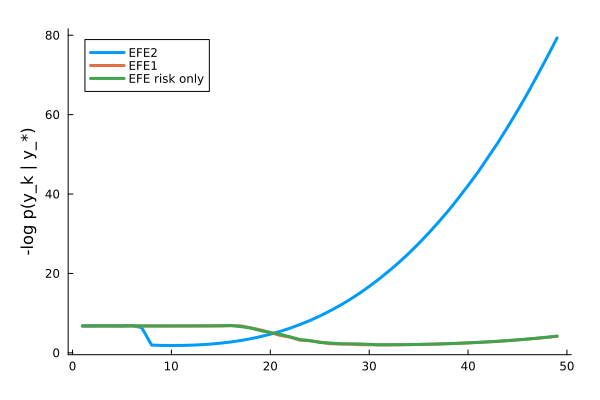

In [6]:
plot(ylabel="-log p(y_k | y_*)")
plot!(mean(YGP_EFE2[:,ix], dims=2), label="EFE2")
plot!(mean(YGP_EFE1[:,ix], dims=2), label="EFE1")
plot!(mean(YGP_EFER[:,ix], dims=2), label="EFE risk only")
# plot!(mean(YGP_MPC[:,ix], dims=2), label="MPC")

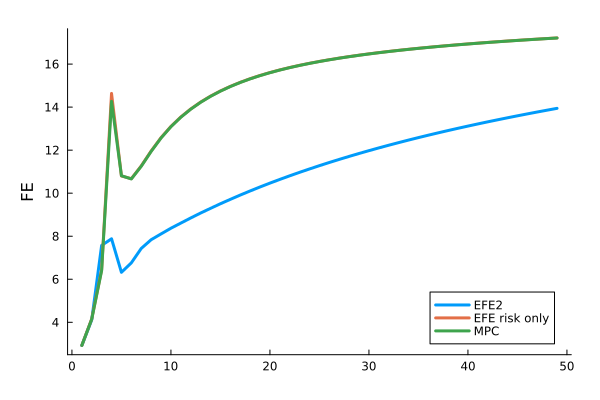

In [7]:
plot(ylabel="FE")
plot!(mean(FE2_EFE2[:,ix], dims=2), label="EFE2")
# plot!(mean(FE2_EFE1[:,ix], dims=2), label="EFE1")
plot!(mean(FE2_EFER[:,ix], dims=2), label="EFE risk only")
plot!(mean(FE2_MPC[:,ix], dims=2), label="MPC")

In [129]:
# yl = (1e-2, 1e3)
# ix = 1:100

# p1 = plot(xlabel="time (ms)", ylabel="F[q]", title="F_{EFE2} = $tF_EFE2")
# for (kk,tt) in enumerate(tsteps[2:end])
#     scatter!([tt], exp.(-FE_EFE2[kk,ix]'), color="blue", ylims=yl, yscale=:log10)
# end

# p2 = plot(xlabel="time (ms)", ylabel="F[q]", title="F_{EFE1} = $tF_EFE1")
# for (kk,tt) in enumerate(tsteps[2:end])
#     scatter!([tt], exp.(-FE_EFE1[kk,ix]'), color="red", ylims=yl, yscale=:log10)
# end

# p3 = plot(xlabel="time (ms)", ylabel="F[q]", title="F_{EFER} = $tF_EFER")
# for (kk,tt) in enumerate(tsteps[2:end])
#     scatter!([tt], exp.(-FE_EFER[kk,ix]'), color="purple", ylims=yl, yscale=:log10)
# end

# plot(p1,p2,p3, layout=(1,3), size=(1200,500))

In [18]:
# yl = (-10, 1e1)

# p1 = plot(xlabel="time (ms)", ylabel="F[q]", title="F_{EFE2} = $tF2_EFE2")
# for (kk,tt) in enumerate(tsteps[2:end])
#     scatter!([tt], FE2_EFE2[kk,ix]', color="blue", ylims=yl)
# end

# p2 = plot(xlabel="time (ms)", ylabel="F[q]", title="F_{EFE1} = $tF2_EFE1")
# for (kk,tt) in enumerate(tsteps[2:end])
#     scatter!([tt], FE2_EFE1[kk,ix]', color="red", ylims=yl)
# end

# p3 = plot(xlabel="time (ms)", ylabel="F[q]", title="F_{EFER} = $tF2_EFER")
# for (kk,tt) in enumerate(tsteps[2:end])
#     scatter!([tt], FE2_EFER[kk,ix]', color="purple", ylims=yl)
# end

# p4 = plot(xlabel="time (ms)", ylabel="F[q]", title="F_{MPC} = $tF2_MPC")
# for (kk,tt) in enumerate(tsteps[2:end])
#     scatter!([tt], FE2_MPC[kk,ix]', color="purple", ylims=yl)
# end

# plot(p1,p2,p3,p4, layout=(1,4), size=(1200,500))

In [14]:
violin(tsteps[1:5:end], FE2_EFE2[1:5:end,ix], color=:blue, side=:right, linewidth=0)
violin!(tsteps[1:5:end], FE2_EFE2[1:5:end,ix], color=:red, side=:left, linewidth=0)

BoundsError: BoundsError: attempt to access 10-element StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64} at index [11]

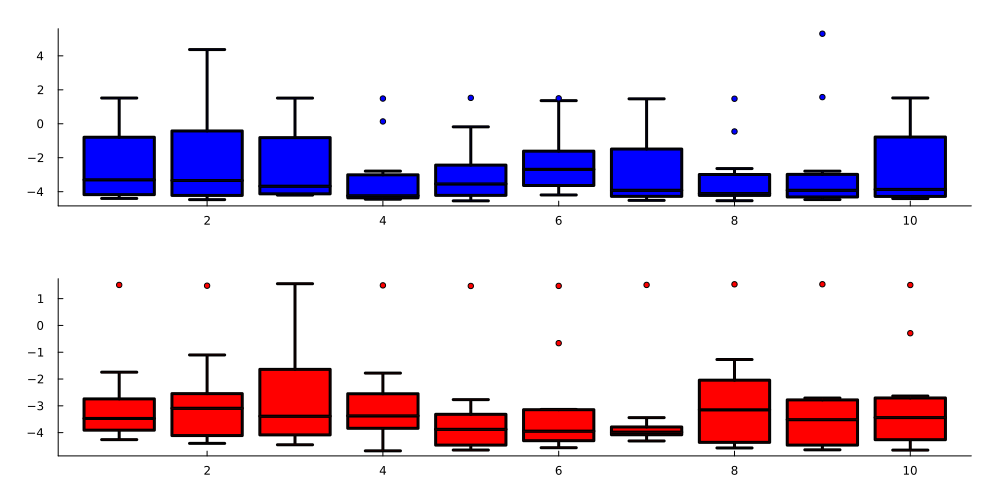

In [15]:
p1 = boxplot(FE2_EFE2[1:5:end,ix], color="blue")
p2 = boxplot(FE2_EFE1[1:5:end,ix], color="red")

plot(p1,p2, layout=(2,1), size=(1000,500))

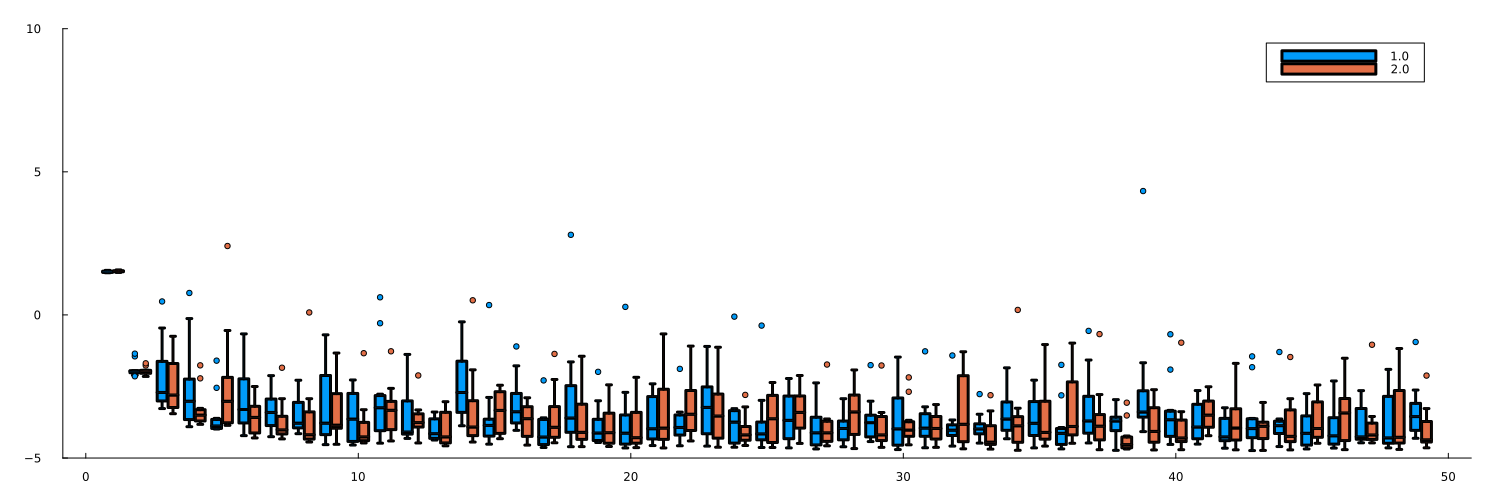

In [19]:
yl = (-5, 10)

FF  = [FE2_EFE1[:]; FE2_EFE2[:]]
FFX = [repeat(range(1,49), length(ix)); repeat(range(1,49), length(ix))]
FFM = [ones(49*length(ix)); 2*ones(49*length(ix))]

groupedboxplot(FFX, FF, group = FFM)
plot!(size=(1500,500), ylims=yl)

In [ ]:
yl = (1e-2, 1e0)
ix = 1:100

p1 = plot(xlabel="time (ms)", ylabel="F[q]", title="F_{EFE2} = $tF_EFE2")
for (kk,tt) in enumerate(tsteps[2:end])
    scatter!([tt], FE_EFE2[kk,ix]', color="blue", ylims=yl)
end

p2 = plot(xlabel="time (ms)", ylabel="F[q]", title="F_{EFE1} = $tF_EFE1")
for (kk,tt) in enumerate(tsteps[2:end])
    scatter!([tt], FE_EFE1[kk,ix]', color="red", ylims=yl)
end

p3 = plot(xlabel="time (ms)", ylabel="F[q]", title="F_{EFER} = $tF_EFER")
for (kk,tt) in enumerate(tsteps[2:end])
    scatter!([tt], FE_EFER[kk,ix]', color="purple", ylims=yl)
end

p4 = plot(xlabel="time (ms)", ylabel="F[q]", title="F_{MPC} = $tF_MPC")
for (kk,tt) in enumerate(tsteps[2:end])
    scatter!([tt], FE_MPC[kk,ix]', color="purple", ylims=yl)
end

plot(p1,p2,p3,p4, layout=(1,4), size=(1200,500))

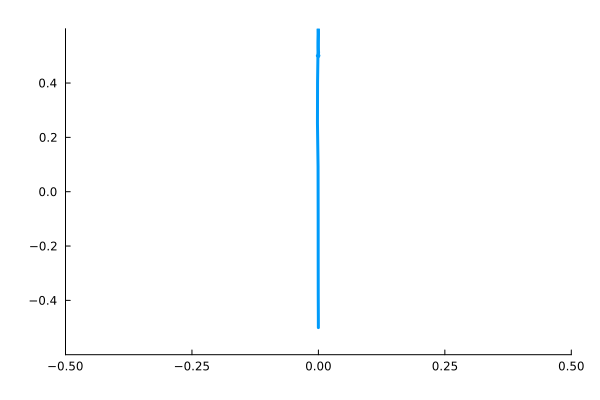

In [20]:
xl = (-.5,.5)
yl = (-.6,.6)

z_sim_EFE2 = results_EFE2["z_sim"]
mz_sim_EFE2 = mean(z_sim_EFE2, dims=3)
sz_sim_EFE2 = std(z_sim_EFE2, dims=3) ./ size(z_sim_EFE2,3)

plot(mz_sim_EFE2[1,:], mz_sim_EFE2[2,:], ribbon=(sz_sim_EFE2[1,:], sz_sim_EFE2[2,:]), xlims=xl, ylims=yl)

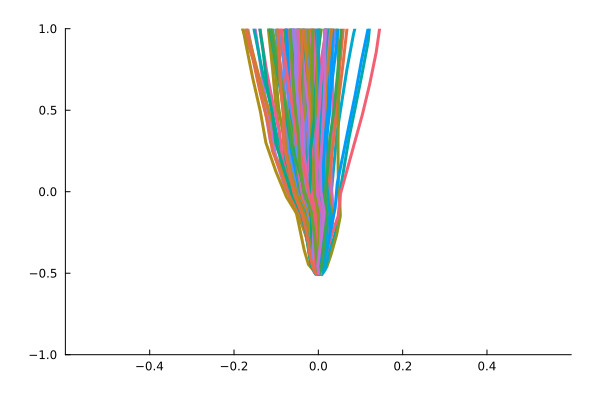

In [8]:
xl = (-.6,.6)
yl = (-1.,1.)

z_sim_EFE2 = results_EFE2["z_sim"]
plot()
for jj in ix
    plot!(z_sim_EFE2[1,:,jj], z_sim_EFE2[2,:,jj], xlims=xl, ylims=yl)
end
plot!()

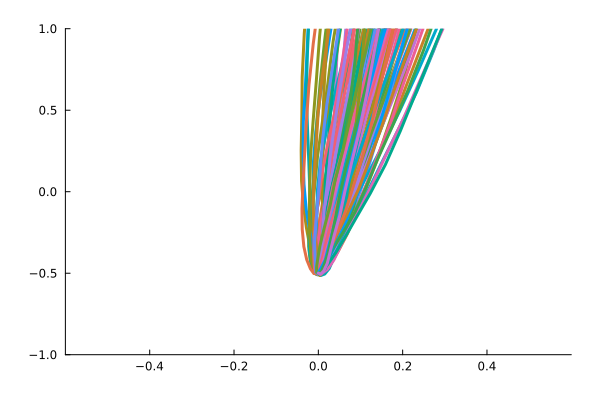

In [21]:
xl = (-.6,.6)
yl = (-1.,1.)

z_sim_EFE1 = results_EFE1["z_sim"]
plot()
for jj in ix
    plot!(z_sim_EFE1[1,:,jj], z_sim_EFE1[2,:,jj], xlims=xl, ylims=yl)
end
plot!()

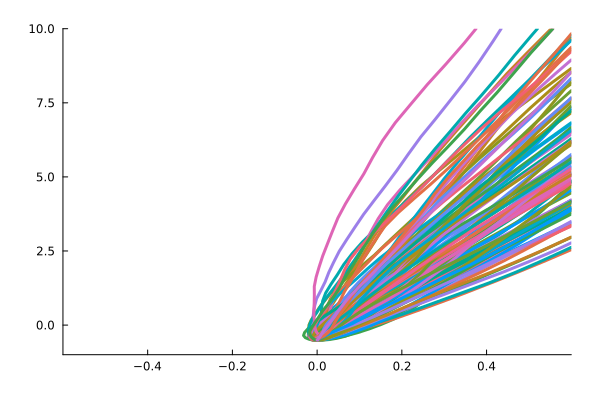

In [23]:
xl = (-.6,.6)
yl = (-1.,10.)

z_sim_MPC = results_MPC["z_sim"]
plot()
for jj in ix
    plot!(z_sim_MPC[1,:,jj], z_sim_MPC[2,:,jj], xlims=xl, ylims=yl)
end
plot!()